In [1]:

# Function to process and display the incoming serial data
def read_serial_data():
    # Initialize a list to collect the parsed data
    data_list = []

    try:
        while True:
            if ser.in_waiting > 0:  # Check if data is available
                line = ser.readline().decode('utf-8').strip()  # Read and decode the line

                if "mpu6050 test:" in line:  # Check if the line contains sensor data
                    # Identify which sensor the data belongs to (MPU1 or MPU2)
                    if "MPU1" in line:
                        sensor_name = "MPU1"
                    elif "MPU2" in line:
                        sensor_name = "MPU2"
                    else:
                        continue  # Skip lines that don't contain "MPU1" or "MPU2"

                    # Split the string into the relevant parts: accelerometer and gyroscope values
                    parts = line.split(',')
                    parts = [item.replace('\x1b[0;32m', '').replace('\x1b[0m', '').strip() for item in parts]
                    raw_data = parts
                    
                    # Extract the accelerometer values
                    sensor_data = {}
                    
                    # Remove the initial part of the first entry (e.g., "I (56182) mpu6050 test: MPU2 acce_x:0.76953")
                    cleaned_first_entry = raw_data[0].split('mpu6050 test: ')[1]  # Get everything after "mpu6050 test: "
                    cleaned_first_entry_parts = cleaned_first_entry.split(' ')  # Split the string into parts

                    # Step 3: Parse accelerometer and gyroscope values from the cleaned parts
                    for entry in cleaned_first_entry_parts:
                        if 'acce_' in entry or 'gyro_' in entry:
                            key_value = entry.split(':')
                            if len(key_value) == 2:  # Check if the split is valid
                                key, value = key_value
                                try:
                                    sensor_data[key] = float(value)  # Convert the value to float
                                except ValueError:
                                    print(f"Warning: Could not convert value '{value}' for {key}")
                            else:
                                print(f"Skipping malformed entry: {entry}")

                    # Step 4: Extract the rest of the accelerometer and gyroscope values from the remaining entries
                    for entry in raw_data[1:]:
                        key_value = entry.split(':')
                        if len(key_value) == 2:  # Check if the split is valid
                            key, value = key_value
                            try:
                                sensor_data[key.strip()] = float(value.strip())  # Convert to float and clean up extra spaces
                            except ValueError:
                                print(f"Warning: Could not convert value '{value.strip()}' for {key.strip()}")
                        else:
                            print(f"Skipping malformed entry: {entry}")

                    sensor_data['sensor'] = sensor_name  # Add sensor name to the data

                    # Append the data to the list
                    data_list.append(sensor_data)

                    # Create a pandas DataFrame from the list and display it
                    if len(data_list) > 0:
                        df = pd.DataFrame(data_list)
                        
                        # Save the data to a CSV file
                        df.to_csv(csv_file, mode='a', header=not pd.io.common.file_exists(csv_file), index=False)
                        
                        data_list.clear()  # Clear the list for the next set of readings

    except KeyboardInterrupt:
        
        # Handle keyboard interrupt and print "collection stopped"
        print("Collection stopped")




In [123]:
import serial
import time
import pandas as pd
from IPython.display import display

# Set up the serial connection (adjust port and baud rate as needed)
ser = serial.Serial('COM8', 115200)  
time.sleep(2)  # Wait for the serial connection to stabilize

# Specify the CSV file name to save data
csv_file = 'finger_down_right_20.csv'

# Run the function to read serial data and store it in CSV
read_serial_data()


Collection stopped


# Visualization

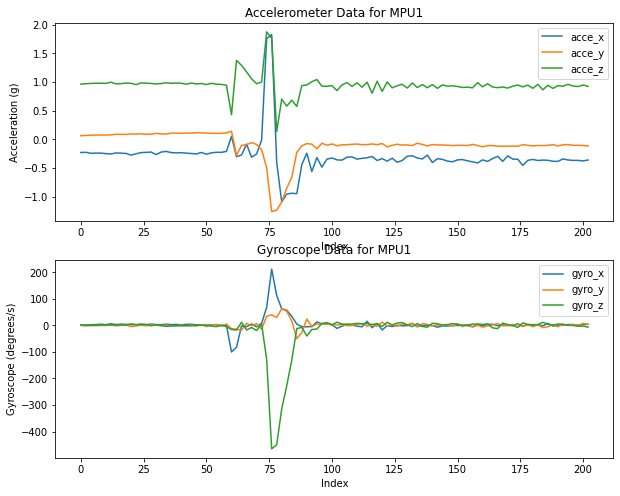

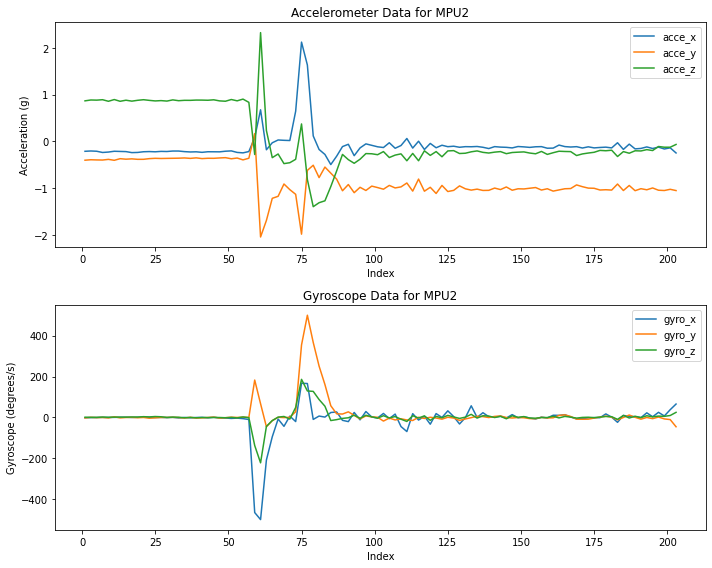

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('finger_down_right_08.csv')

# Filter data for MPU1 and MPU2
imu1_data = df[df['sensor'] == 'MPU1']
imu2_data = df[df['sensor'] == 'MPU2']

# Plotting for MPU1
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # Subplot for Accelerometer
plt.plot(imu1_data.index, imu1_data['acce_x'], label='acce_x')
plt.plot(imu1_data.index, imu1_data['acce_y'], label='acce_y')
plt.plot(imu1_data.index, imu1_data['acce_z'], label='acce_z')
plt.title('Accelerometer Data for MPU1')
plt.xlabel('Index')
plt.ylabel('Acceleration (g)')
plt.legend()

plt.subplot(2, 1, 2)  # Subplot for Gyroscope
plt.plot(imu1_data.index, imu1_data['gyro_x'], label='gyro_x')
plt.plot(imu1_data.index, imu1_data['gyro_y'], label='gyro_y')
plt.plot(imu1_data.index, imu1_data['gyro_z'], label='gyro_z')
plt.title('Gyroscope Data for MPU1')
plt.xlabel('Index')
plt.ylabel('Gyroscope (degrees/s)')
plt.legend()

# Plotting for MPU2
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # Subplot for Accelerometer
plt.plot(imu2_data.index, imu2_data['acce_x'], label='acce_x')
plt.plot(imu2_data.index, imu2_data['acce_y'], label='acce_y')
plt.plot(imu2_data.index, imu2_data['acce_z'], label='acce_z')
plt.title('Accelerometer Data for MPU2')
plt.xlabel('Index')
plt.ylabel('Acceleration (g)')
plt.legend()

plt.subplot(2, 1, 2)  # Subplot for Gyroscope
plt.plot(imu2_data.index, imu2_data['gyro_x'], label='gyro_x')
plt.plot(imu2_data.index, imu2_data['gyro_y'], label='gyro_y')
plt.plot(imu2_data.index, imu2_data['gyro_z'], label='gyro_z')
plt.title('Gyroscope Data for MPU2')
plt.xlabel('Index')
plt.ylabel('Gyroscope (degrees/s)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Data Collection

In [106]:
# import time
# import pandas as pd

# # Set up the serial connection (adjust port and baud rate as needed)
# ser = serial.Serial('/dev/ttyUSB1', 115200)  
# time.sleep(2)  # Wait for the serial connection to stabilize

# # Function to collect data for 7 seconds and store it in a separate CSV file
# def collect_data_to_csv():
#     # Collect data for 11 separate files (up_0.csv to up_10.csv)
#     for i in range(11):
#         csv_file = f'up_{i}.csv'  # Dynamically name the CSV file
#         print("start")  # Indicate the start of data collection

#         # Initialize a list to store collected data
#         data_list = []
#         start_time = time.time()  # Record the start time for data collection

#         # Collect data for 7 seconds
#         while time.time() - start_time < 7:
#             if ser.in_waiting > 0:  # Check if data is available
#                 line = ser.readline().decode('utf-8').strip()  # Read and decode the line

#                 if "mpu6050 test:" in line:  # Check if the line contains sensor data
#                     # Identify which sensor the data belongs to (MPU1 or MPU2)
#                     if "MPU1" in line:
#                         sensor_name = "MPU1"
#                     elif "MPU2" in line:
#                         sensor_name = "MPU2"
#                     else:
#                         continue  # Skip lines that don't contain "MPU1" or "MPU2"

#                     # Split the string into the relevant parts: accelerometer and gyroscope values
#                     parts = line.split(',')
#                     parts = [item.replace('\x1b[0;32m', '').replace('\x1b[0m', '').strip() for item in parts]
#                     raw_data = parts
                    
#                     # Extract the accelerometer and gyroscope values
#                     sensor_data = {}

#                     # Remove the initial part of the first entry
#                     cleaned_first_entry = raw_data[0].split('mpu6050 test: ')[1]  # Get everything after "mpu6050 test: "
#                     cleaned_first_entry_parts = cleaned_first_entry.split(' ')  # Split the string into parts

#                     # Parse accelerometer and gyroscope values
#                     for entry in cleaned_first_entry_parts:
#                         if 'acce_' in entry or 'gyro_' in entry:
#                             key_value = entry.split(':')
#                             if len(key_value) == 2:  # Check if the split is valid
#                                 key, value = key_value
#                                 try:
#                                     sensor_data[key] = float(value)  # Convert the value to float
#                                 except ValueError:
#                                     print(f"Warning: Could not convert value '{value}' for {key}")
#                             else:
#                                 print(f"Skipping malformed entry: {entry}")

#                     # Extract the rest of the accelerometer and gyroscope values from the remaining entries
#                     for entry in raw_data[1:]:
#                         key_value = entry.split(':')
#                         if len(key_value) == 2:  # Check if the split is valid
#                             key, value = key_value
#                             try:
#                                 sensor_data[key.strip()] = float(value.strip())  # Convert to float and clean up extra spaces
#                             except ValueError:
#                                 print(f"Warning: Could not convert value '{value.strip()}' for {key.strip()}")
#                         else:
#                             print(f"Skipping malformed entry: {entry}")

#                     sensor_data['sensor'] = sensor_name  # Add sensor name to the data

#                     # Append the data to the list
#                     data_list.append(sensor_data)

#         # Create a pandas DataFrame from the collected data
#         df = pd.DataFrame(data_list)
        
#         # Save the collected data to a CSV file
#         df.to_csv(csv_file, mode='a', header=not pd.io.common.file_exists(csv_file), index=False)

#         print("stop")  # Indicate the end of data collection for this file

# # Run the function to collect and store data in multiple CSV files
# collect_data_to_csv()


In [118]:
# Set up the serial connection (adjust port and baud rate as needed)
ser = serial.Serial('/dev/ttyUSB2', 115200)  
time.sleep(2)  # Wait for the serial connection to stabilize

# Specify the CSV file name to save data
csv_file = 'up_01.csv'

# Run the function to read serial data and store it in CSV
read_serial_data()

Collection stopped
